## Backtesting Predictions

Now that we have predictive Time-Series models, we want to backtest them against the real data. 

We cannot use a standard metric like **Sum of Squared Errors** here, because it and others like it (MAPE, RMSE, etc.) use some form of $\sum(\hat{y_{i}}-y_{i})$ which would require predictions to be accurate on a *month-by-month* basis. But earthquakes are believed to be unpredictable (see [United States Geological Survey for more](https://www.usgs.gov/faqs/can-you-predict-earthquakes)). Therefore, we want to see if our models predicted the same *number of events* over a ten-year period as the real data.

There are two types of predictions under consideration:
* Backtesting predictions against actual data
    * 2013 - 2023
* Future predictions that haven't occurred yet
    * 2023 - 2028
 
Every dataset below takes the distance-weighted energy observations from **one** lattice point, and then tries to predict monthly energy observations.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [61]:
main_df = pd.read_csv("../Data/LA_energy_1970_2023.csv")
transposed_df = main_df.drop(columns=['Latitude','Longitude']).T
transposed_df.index = pd.to_datetime(transposed_df.index, format='%Y_%m')
transposed_df.index.names = ['DATE']
transposed_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,321067.119801,321135.048331,321124.857167,321042.681773,320896.868751,320696.998421,320453.023487,320174.622771,319870.785259,319549.580501,...,330375.343979,331692.410816,333540.318673,335854.239982,338056.517228,338781.130565,337206.412599,334433.569361,331723.455688,329467.781893
1970-02-01,217466.025395,217858.321949,218220.005878,218560.875641,218891.321623,219219.660568,219551.121548,219889.987552,220246.145972,220647.076863,...,212851.584622,212614.553994,212357.237275,212083.543453,211797.622578,211503.571619,211205.199775,210905.873823,210608.441399,210315.216979
1970-03-01,216460.713365,217512.038970,218890.530045,220840.334270,223822.556741,228579.253880,234618.200632,235199.597137,229620.977354,224987.729336,...,217423.033571,218176.468137,219029.472636,219920.430917,220664.378128,220975.150370,220697.452192,219992.508723,219151.974410,218364.029661


### 2013 - 2023 datasets

These datasets cover 10 arbitrary lattice points for which we have monthly energy predictions. The models are:
* MLR - multiple linear regression
* LASSO - lasso regression
* XGBoost - extreme gradient boosting
* LSTM - long short term memory recurrent neural net

Note that MLR tends to strongly coincide with LASSO, and is mostly hidden in charts below. 

We also have the "actual" data to gauge predictive capabilities:

In [3]:
#read in the backtested predictions
df0 = pd.read_excel('../Data/final_time_series_project0.xlsx', sheet_name='lvl_test_set_predictions')
df1 = pd.read_excel('../Data/final_time_series_project1.xlsx', sheet_name='lvl_test_set_predictions')
df2 = pd.read_excel('../Data/final_time_series_project2.xlsx', sheet_name='lvl_test_set_predictions')
df3 = pd.read_excel('../Data/final_time_series_project3.xlsx', sheet_name='lvl_test_set_predictions')
df4 = pd.read_excel('../Data/final_time_series_project4.xlsx', sheet_name='lvl_test_set_predictions')
df5 = pd.read_excel('../Data/final_time_series_project5.xlsx', sheet_name='lvl_test_set_predictions')
df6 = pd.read_excel('../Data/final_time_series_project6.xlsx', sheet_name='lvl_test_set_predictions')
df7 = pd.read_excel('../Data/final_time_series_project7.xlsx', sheet_name='lvl_test_set_predictions')
df8 = pd.read_excel('../Data/final_time_series_project8.xlsx', sheet_name='lvl_test_set_predictions')
df9 = pd.read_excel('../Data/final_time_series_project9.xlsx', sheet_name='lvl_test_set_predictions')

df0.head()

,DATE,actual,mlr,lasso,xgboost,lstm
0,2013-01-01,9.929226e+06,10943120,1.097388e+07,9369162.0,1.297938e+06
1,2013-02-01,7.521204e+06,10379920,1.042931e+07,8202414.5,1.581242e+06
2,2013-03-01,1.114660e+07,10637968,1.069990e+07,7888832.0,1.519692e+06
3,2013-04-01,1.230655e+07,9929360,1.000031e+07,8135144.5,2.068235e+06
4,2013-05-01,1.294165e+07,9941648,1.002133e+07,9618328.0,1.766591e+06


### 2023 - 2028 datasets

These datasets cover the same arbitrary lattice points, and they're making monthly predictions of earthquake energy release over the next 5 years.

In [10]:
#read in the future predictions
pred_df0 = pd.read_excel('../Data/final_time_series_project0.xlsx', sheet_name='lvl_fcsts')
pred_df1 = pd.read_excel('../Data/final_time_series_project1.xlsx', sheet_name='lvl_fcsts')
pred_df2 = pd.read_excel('../Data/final_time_series_project2.xlsx', sheet_name='lvl_fcsts')
pred_df3 = pd.read_excel('../Data/final_time_series_project3.xlsx', sheet_name='lvl_fcsts')
pred_df4 = pd.read_excel('../Data/final_time_series_project4.xlsx', sheet_name='lvl_fcsts')
pred_df5 = pd.read_excel('../Data/final_time_series_project5.xlsx', sheet_name='lvl_fcsts')
pred_df6 = pd.read_excel('../Data/final_time_series_project6.xlsx', sheet_name='lvl_fcsts')
pred_df7 = pd.read_excel('../Data/final_time_series_project7.xlsx', sheet_name='lvl_fcsts')
pred_df8 = pd.read_excel('../Data/final_time_series_project8.xlsx', sheet_name='lvl_fcsts')
pred_df9 = pd.read_excel('../Data/final_time_series_project9.xlsx', sheet_name='lvl_fcsts')

pred_df0.head()

,DATE,mlr,lasso,xgboost,lstm
0,2023-10-01,9117696,9.123509e+06,9609935,2.540432e+06
1,2023-11-01,10682368,1.071596e+07,39785372,2.152284e+06
2,2023-12-01,11657216,1.162631e+07,15744358,2.206609e+06
3,2024-01-01,13721600,1.377885e+07,13273595,2.093049e+06
4,2024-02-01,12615680,1.265986e+07,12152594,2.462048e+06


#### Example

We set the energy benchmarks corresponding to magnitude 2, 3, 4, and 5 earthquakes. Then we determine for one gridpoint how many actual months had a magnitude 2 (or higher) earthquake over the last 10 years, and how many each model predicted.

In this example, we see that gridpoint #3 had **8** months with cumulative earthquake energy above magnitude 2. XGBoost was the only model to predict 7 months of magnitude 2 earthquake energy over the same period of time, and the other models did not predict any such months.

The visualizations also help us to gauge the plausibility of model predictions, e.g. "the eye test"

In [197]:
#set the energy benchmarks
mag2 = 10 ** (4.4 + 1.5*2)
mag3 = 10 ** (4.4 + 1.5*3)
mag4 = 10 ** (4.4 + 1.5*4)
mag5 = 10 ** (4.4 + 1.5*5)

In [198]:
print(f"MAGNITUDE: 2")
print(f"actual:    {len(df3[df3['actual'] > mag2])} ")
print(f"mlr:       {len(df3[df3['mlr'] > mag2])} ")
print(f"lasso:     {len(df3[df3['lasso'] > mag2])}")
print(f"xgboost:   {len(df3[df3['xgboost'] > mag2])}")
print(f"lstm:      {len(df3[df3['lstm'] > mag2])}")


MAGNITUDE: 2
actual:    8 
mlr:       0 
lasso:     0
xgboost:   7
lstm:      0


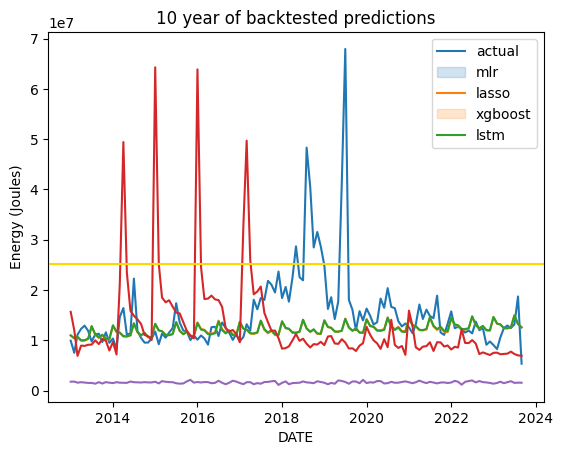

In [250]:
sns.lineplot(data = pd.melt(df3, ['DATE']), x='DATE', y='value', hue='variable')
plt.axhline(mag2,color='gold')
plt.legend(['actual','mlr','lasso','xgboost','lstm'])
plt.ylabel('Energy (Joules)')
plt.title('10 year of backtested predictions');

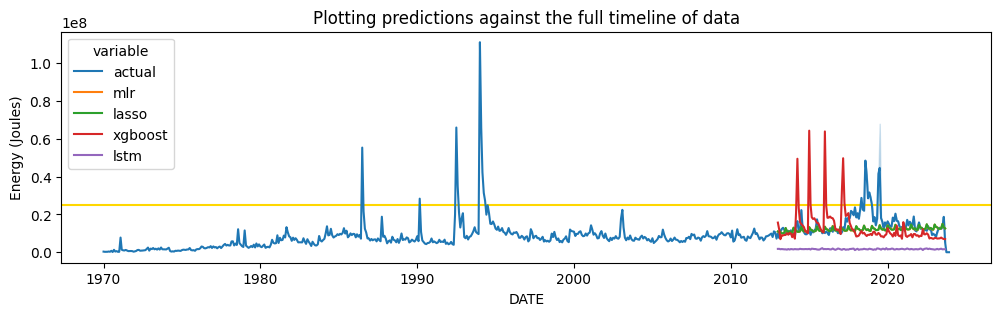

In [251]:
test_df = pd.concat((transposed_df.rename({0:'actual'}, axis=1).reset_index()[['DATE','actual']],
                     df3[['DATE','actual','mlr','lasso', 'xgboost','lstm']]))

plt.figure(figsize=(12,3))
plt.axhline(mag2,color='gold')
sns.lineplot(data = pd.melt(test_df, ['DATE']), x='DATE', y='value', hue='variable')
plt.ylabel("Energy (Joules)")
plt.title("Plotting predictions against the full timeline of data");

### Putting it all together -- backtesting predictions from 2013 to 2023

Let's define a function putting all the above elements together, and then look at each of the 10 lattice gridpoint predictions.

In [252]:
def prediction_analyzer2(df, long_df, pred_df, j):
    print(f"Magnitude 2, actual:  {len(df[df['actual'] > mag2])}")
    print(f"Magnitude 2, mlr:     {len(df[df['mlr'] > mag2])}")
    print(f"Magnitude 2, lasso:   {len(df[df['lasso'] > mag2])}")
    print(f"Magnitude 2, xgboost: {len(df[df['xgboost'] > mag2])}")
    print(f"Magnitude 2, lstm:    {len(df[df['lstm'] > mag2])}")

    print("\n Predicting future Magnitude\n 1 | 2 | 3 | 4 | 5 | ")
    for col in ['mlr','lasso','xgboost','lstm']:
        print(f"\n{col}")
        for i in range(1,6):
            mag = 10**(4.4+1.5*i)
            print(f"{len(pred_df[pred_df[col] > mag])}", end = ' | ')

    plt.figure(figsize=(6,3))
    sns.lineplot(data = pd.melt(df, ['DATE']), x='DATE', y='value', hue='variable')
    plt.axhline(mag2, color='pink')
    plt.ylabel('Energy')
    plt.xlabel('Observation months')
    plt.title(f'Prediction models, 2013 - 2023 (gridpoint {j})')
    plt.legend()
    plt.show()

    graph_df = pd.concat((long_df.rename({j:'actual'}, axis=1).reset_index()[['DATE','actual']],
                     df[['DATE','actual','mlr','lasso', 'xgboost','lstm']]))


    plt.figure(figsize=(12,3))
    sns.lineplot(data = pd.melt(graph_df, ['DATE']), x='DATE', y='value', hue='variable')
    plt.ylabel('Energy')
    plt.title(f'Full history, 1970 to 2023 (gridpoint {j})')
    plt.show()

Magnitude 2, actual:  7
Magnitude 2, mlr:     0
Magnitude 2, lasso:   0
Magnitude 2, xgboost: 0
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
60 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 
xgboost
60 | 2 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

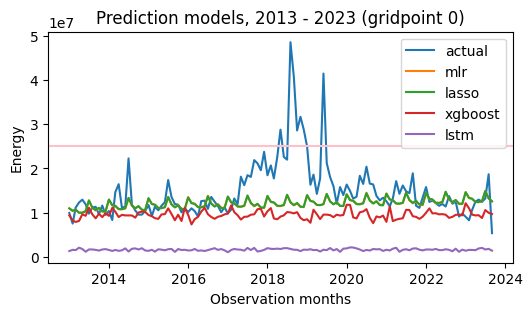

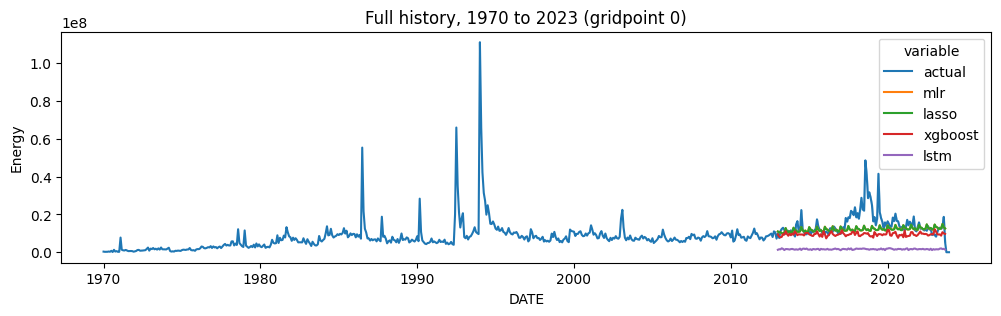

In [253]:
prediction_analyzer2(df0, transposed_df, pred_df0, 0)

Magnitude 2, actual:  7
Magnitude 2, mlr:     0
Magnitude 2, lasso:   0
Magnitude 2, xgboost: 1
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
60 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 
xgboost
60 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

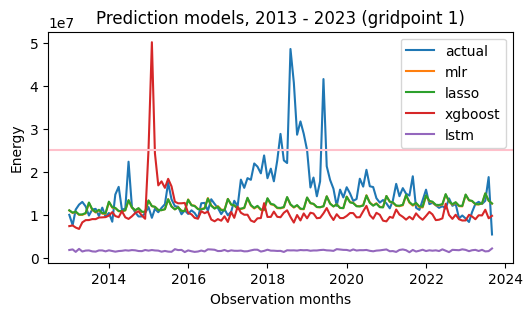

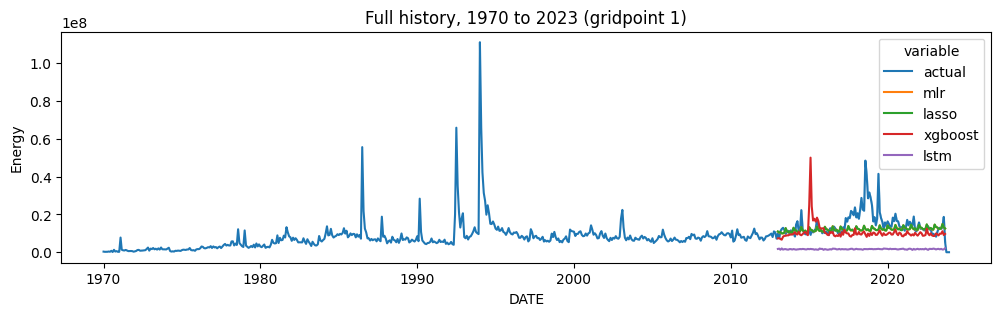

In [254]:
prediction_analyzer2(df1, transposed_df, pred_df1, 1)

Magnitude 2, actual:  7
Magnitude 2, mlr:     0
Magnitude 2, lasso:   0
Magnitude 2, xgboost: 2
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
60 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 
xgboost
60 | 3 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

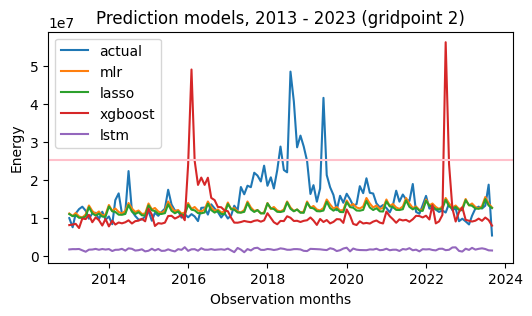

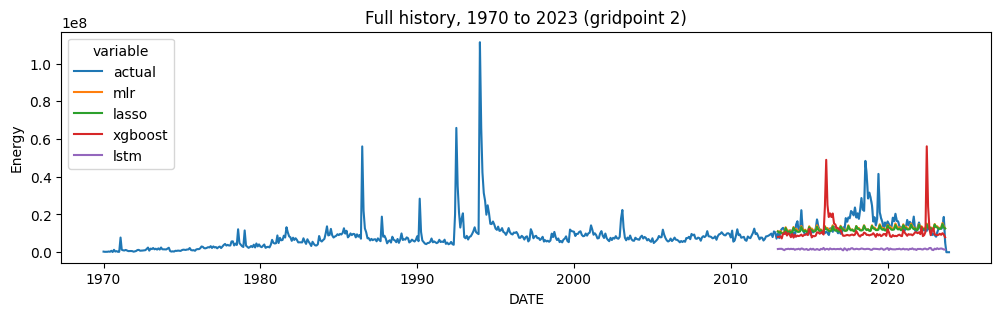

In [255]:
prediction_analyzer2(df2, transposed_df, pred_df2, 2)

Magnitude 2, actual:  8
Magnitude 2, mlr:     0
Magnitude 2, lasso:   0
Magnitude 2, xgboost: 7
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
60 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 
xgboost
60 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

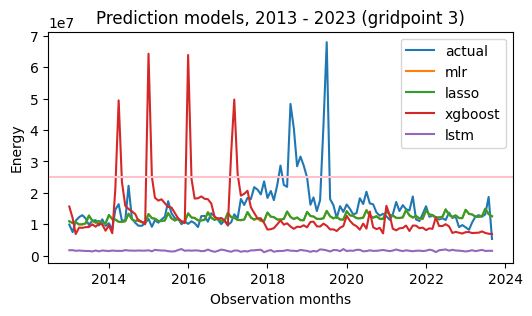

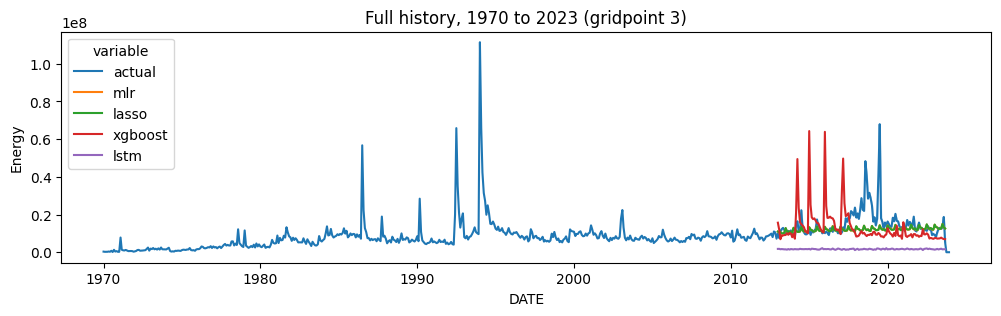

In [256]:
prediction_analyzer2(df3, transposed_df, pred_df3, 3)

Magnitude 2, actual:  7
Magnitude 2, mlr:     0
Magnitude 2, lasso:   0
Magnitude 2, xgboost: 6
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
60 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 
xgboost
60 | 13 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

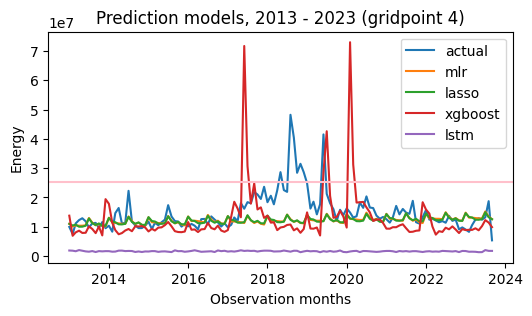

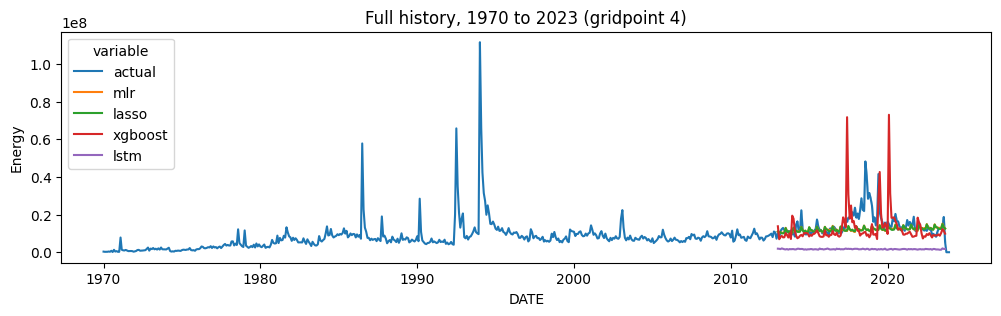

In [257]:
prediction_analyzer2(df4, transposed_df, pred_df4, 4)

Magnitude 2, actual:  7
Magnitude 2, mlr:     0
Magnitude 2, lasso:   0
Magnitude 2, xgboost: 9
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
60 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 
xgboost
60 | 1 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

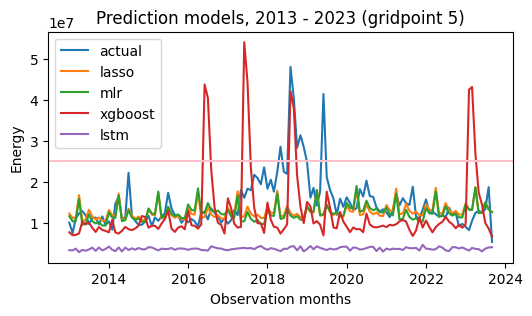

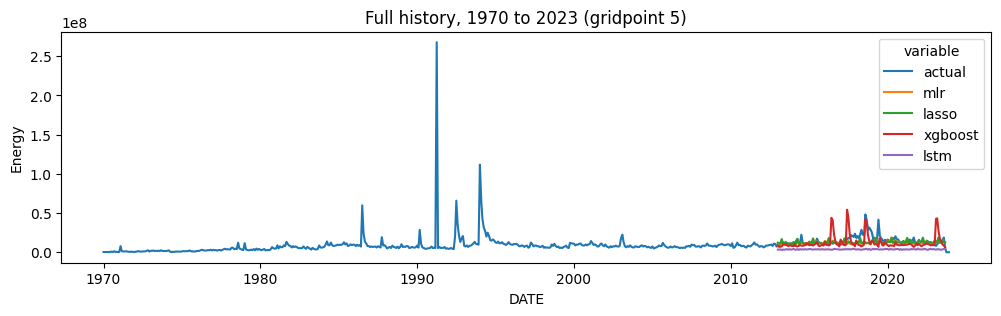

In [258]:
prediction_analyzer2(df5, transposed_df, pred_df5, 5)

Magnitude 2, actual:  7
Magnitude 2, mlr:     0
Magnitude 2, lasso:   0
Magnitude 2, xgboost: 4
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
60 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 
xgboost
60 | 1 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

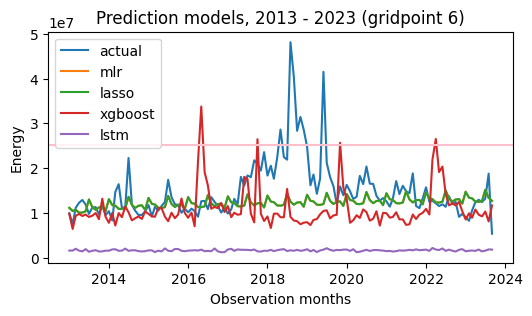

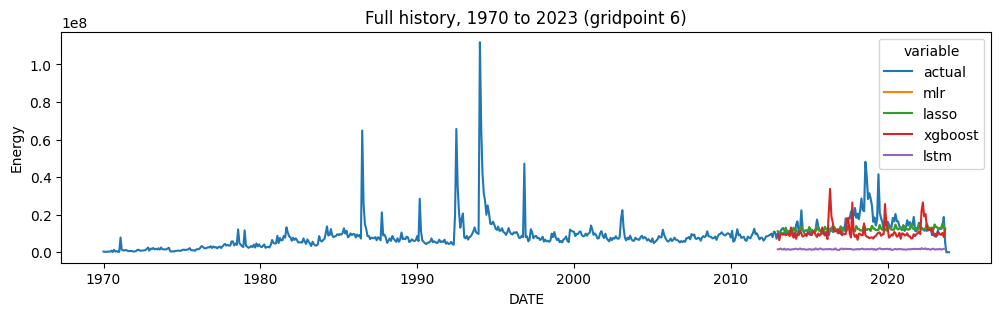

In [259]:
prediction_analyzer2(df6, transposed_df, pred_df6, 6)

Magnitude 2, actual:  8
Magnitude 2, mlr:     59
Magnitude 2, lasso:   53
Magnitude 2, xgboost: 33
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
42 | 4 | 0 | 0 | 0 | 
lasso
49 | 9 | 0 | 0 | 0 | 
xgboost
60 | 7 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

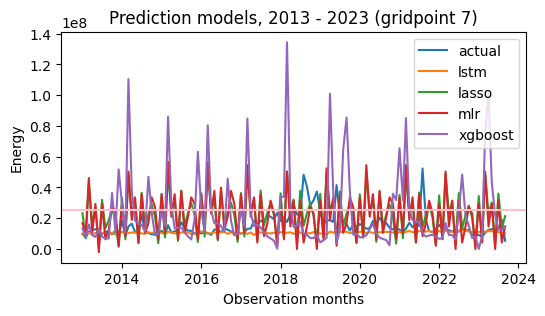

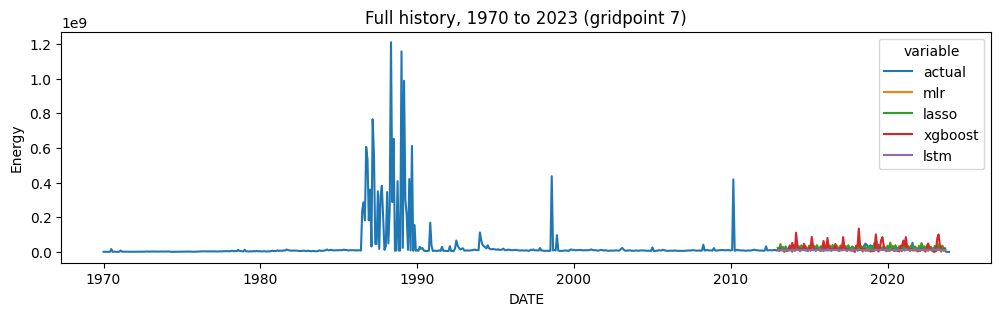

In [260]:
prediction_analyzer2(df7, transposed_df, pred_df7, 7)

Magnitude 2, actual:  8
Magnitude 2, mlr:     47
Magnitude 2, lasso:   47
Magnitude 2, xgboost: 106
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
20 | 19 | 0 | 0 | 0 | 
lasso
20 | 20 | 0 | 0 | 0 | 
xgboost
57 | 22 | 3 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

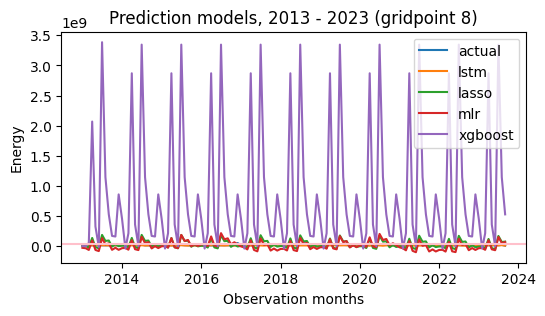

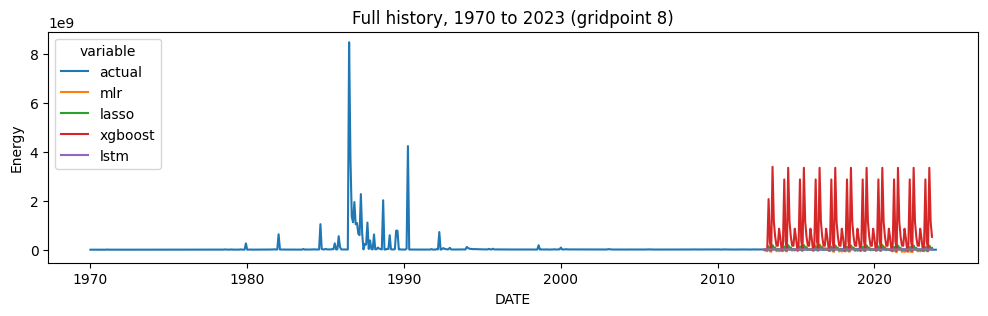

In [261]:
prediction_analyzer2(df8, transposed_df, pred_df8, 8)

Magnitude 2, actual:  7
Magnitude 2, mlr:     0
Magnitude 2, lasso:   0
Magnitude 2, xgboost: 7
Magnitude 2, lstm:    0

 Predicting future Magnitude
 1 | 2 | 3 | 4 | 5 | 

mlr
60 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 
xgboost
60 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 

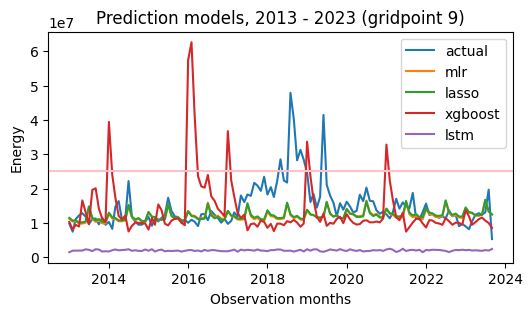

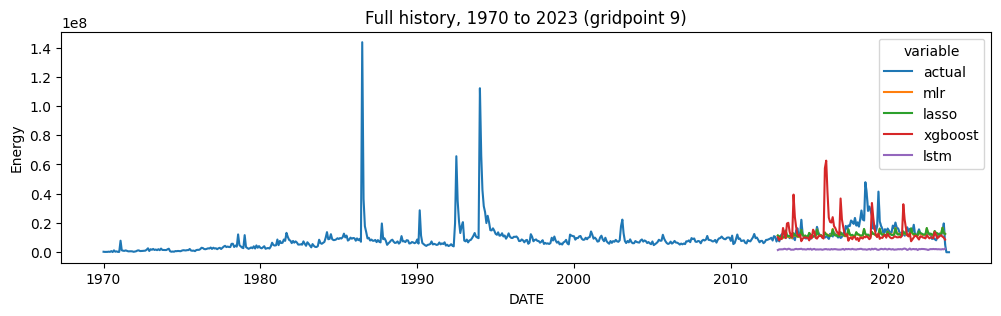

In [262]:
prediction_analyzer2(df9, transposed_df, pred_df9, 9)

## Future predictions above certain magnitude levels

Now we look at predictions from 2023 to 2028 and visualize them against the actual historical data

In [263]:
mag1 = 10**(4.4+1.5*1)
mag2 = 10**(4.4+1.5*2)
mag3 = 10**(4.4+1.5*3)
mag4 = 10**(4.4+1.5*4)
mag5 = 10**(4.4+1.5*5)
mag6 = 10**(4.4+1.5*6)
mag7 = 10**(4.4+1.5*7)

In [264]:
def future_predictor(df, pred_df, k):
    print(f'Grid point {k}\n')
    print("Predicted Magnitude\n 1 | 2 | 3 | 4 | 5 | 6 | 7 |")
    for col in ['mlr','lasso','xgboost','lstm']:
        print(f"\n{col}")
        for i in range(1,8):
            mag = 10**(4.4+1.5*i)
            print(f"{len(pred_df[pred_df[col] > mag])}", end = ' | ')

    graph1_df = pd.concat((df[['DATE','actual']], 
                     pred_df[['DATE','mlr','lasso', 'xgboost','lstm']]))
    
    graph2_df = pd.concat((transposed_df.rename({k:'actual'}, axis=1).reset_index()[['DATE','actual']],
                     df[['DATE','actual']], 
                     pred_df[['DATE','mlr','lasso', 'xgboost','lstm']]))
    
    plt.figure(figsize=(6,3))
    sns.lineplot(data=pd.melt(graph1_df, 'DATE'), x = 'DATE', y = 'value', hue = 'variable')
    plt.title('Future predictions')
    plt.ylabel('Energy (Joules)')
    plt.show();

    plt.figure(figsize=(12,3))
    sns.lineplot(data=pd.melt(graph2_df, 'DATE'), x = 'DATE', y = 'value', hue = 'variable')
    plt.ylabel('Energy (Joules)')
    plt.title('Predictions over the full timeline')
    plt.show();

Grid point 0

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 2 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

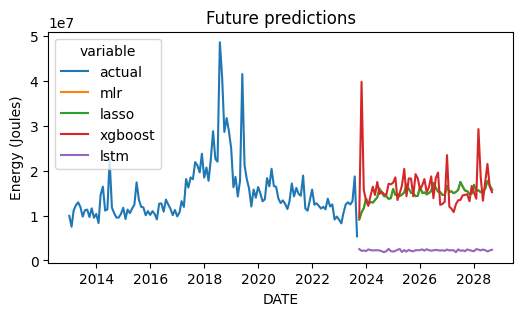

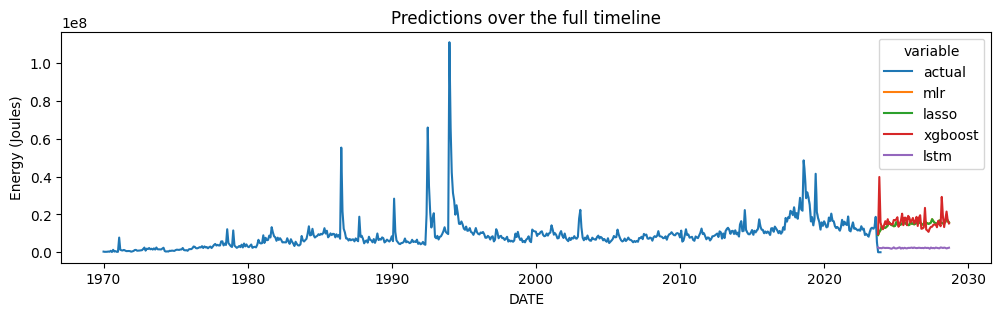

In [265]:
future_predictor(df0, pred_df0, 0)

Grid point 1

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

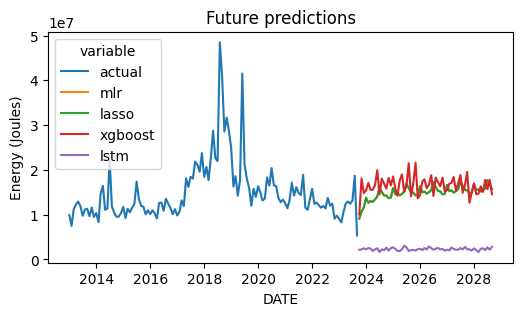

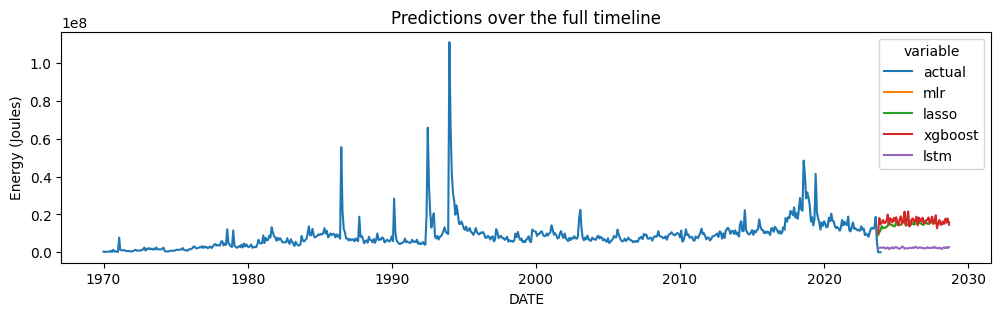

In [266]:
future_predictor(df1, pred_df1, 1)

Grid point 2

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 3 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

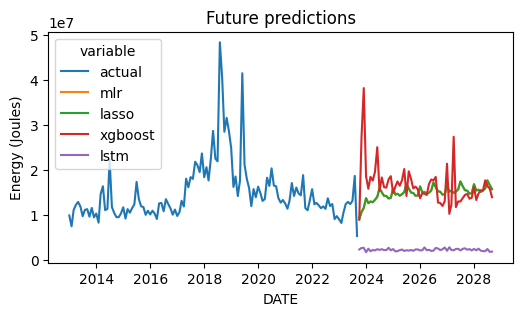

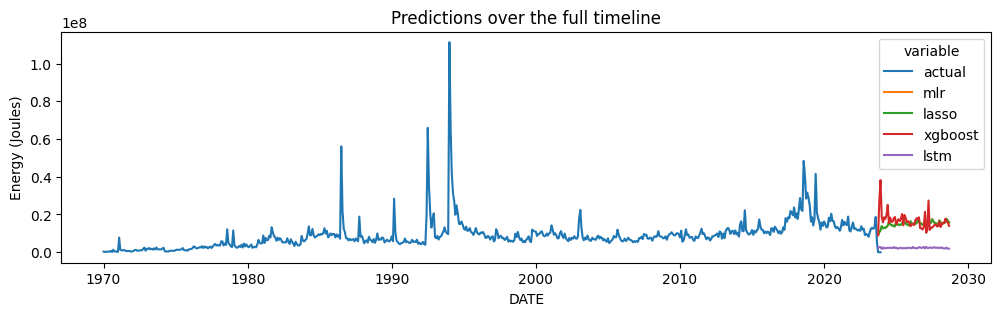

In [267]:
future_predictor(df2, pred_df2, 2)

Grid point 3

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

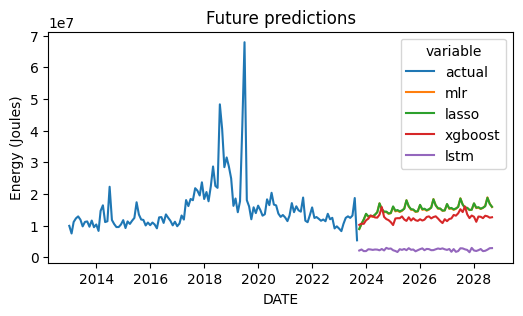

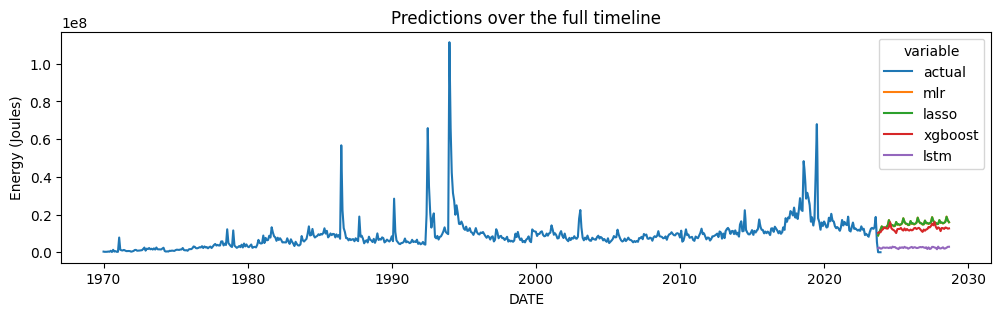

In [268]:
future_predictor(df3, pred_df3, 3)

Grid point 4

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 13 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

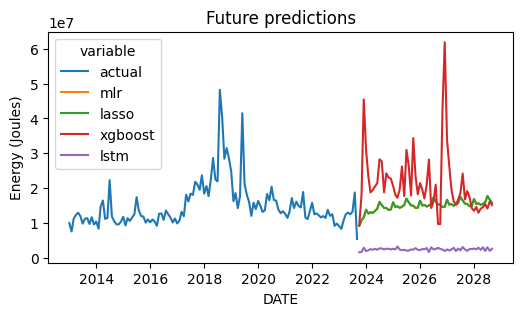

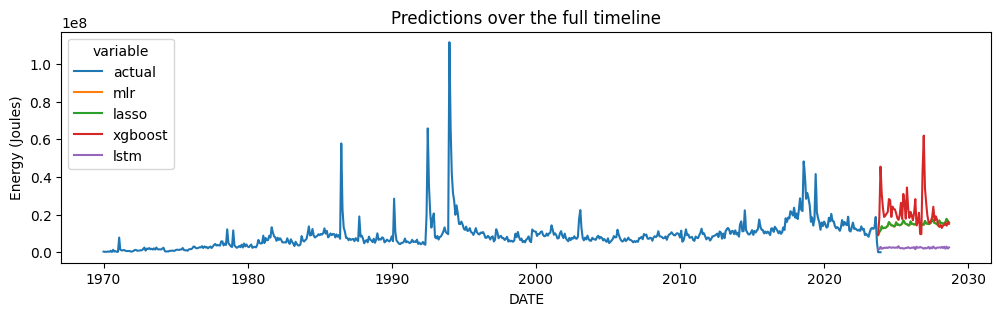

In [269]:
future_predictor(df4, pred_df4, 4)

Grid point 5

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 1 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

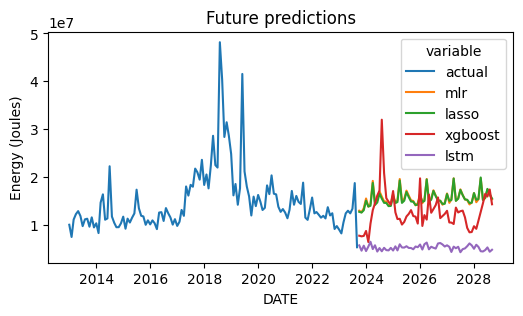

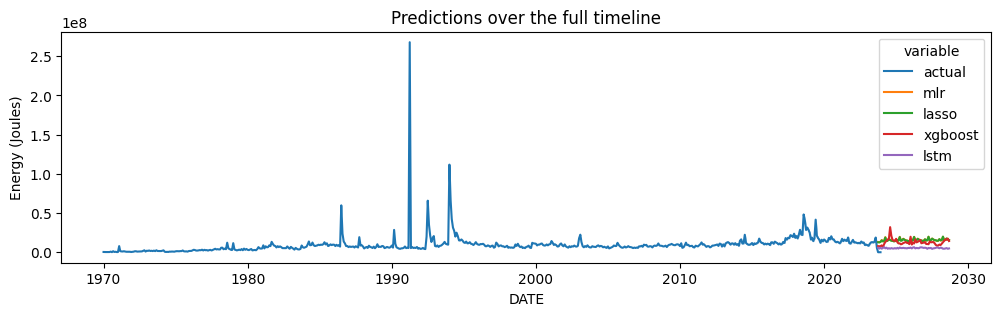

In [270]:
future_predictor(df5, pred_df5, 5)

Grid point 6

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 1 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

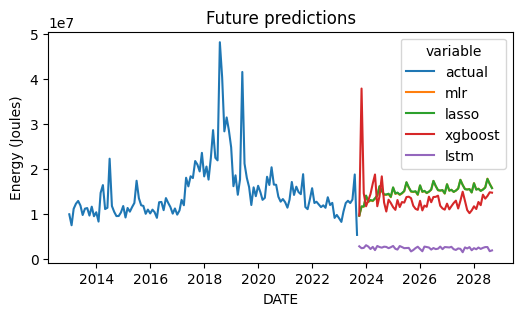

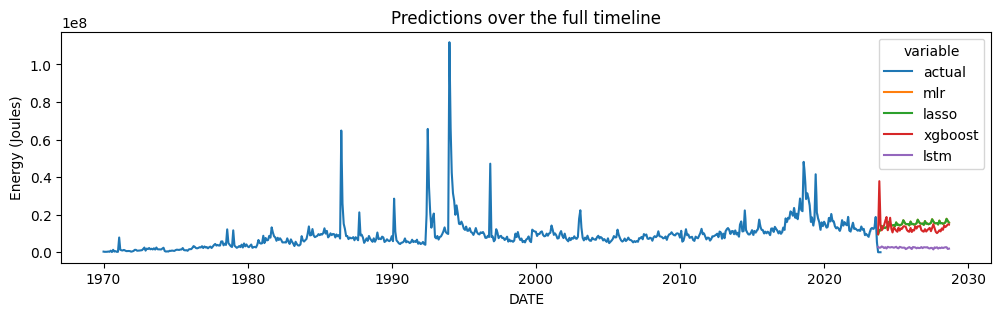

In [271]:
future_predictor(df6, pred_df6, 6)

Grid point 7

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
42 | 4 | 0 | 0 | 0 | 0 | 0 | 
lasso
49 | 9 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 7 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

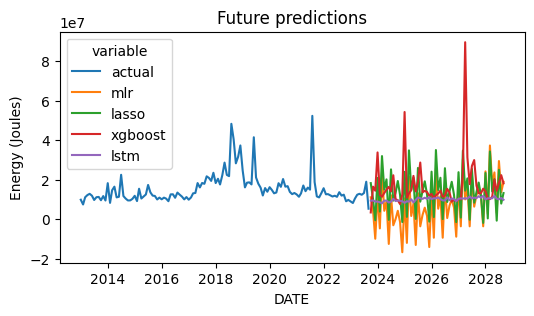

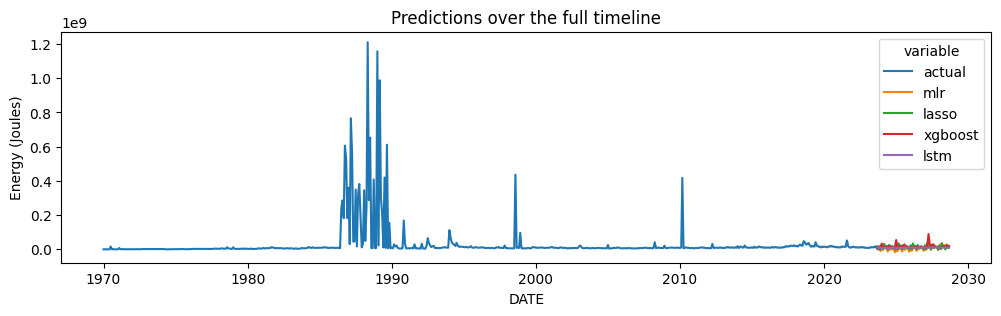

In [272]:
future_predictor(df7, pred_df7, 7)

Grid point 8

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
20 | 19 | 0 | 0 | 0 | 0 | 0 | 
lasso
20 | 20 | 0 | 0 | 0 | 0 | 0 | 
xgboost
57 | 22 | 3 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

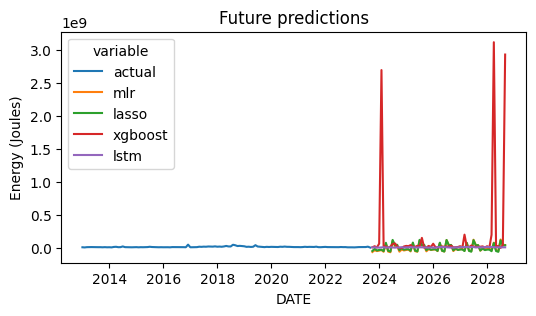

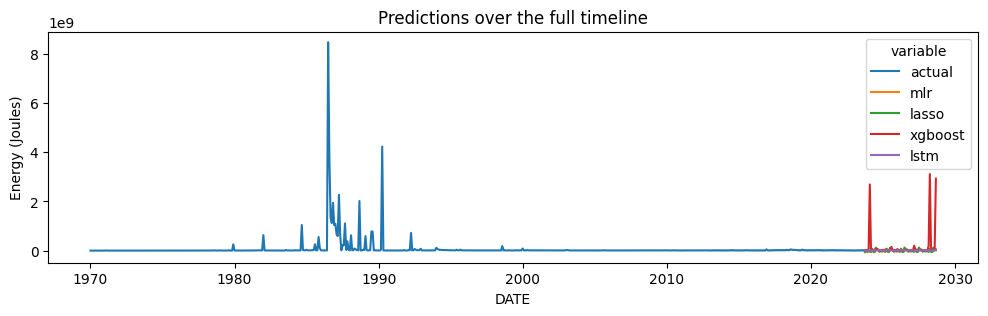

In [273]:
future_predictor(df8, pred_df8, 8)

Grid point 9

Predicted Magnitude
 1 | 2 | 3 | 4 | 5 | 6 | 7 |

mlr
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lasso
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
xgboost
60 | 0 | 0 | 0 | 0 | 0 | 0 | 
lstm
60 | 0 | 0 | 0 | 0 | 0 | 0 | 

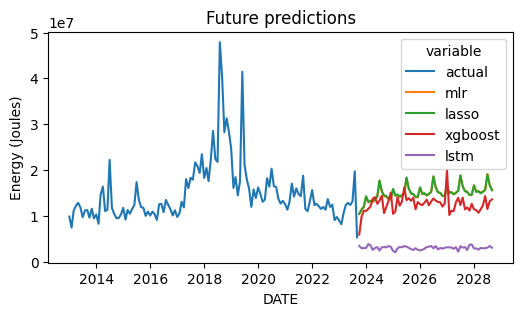

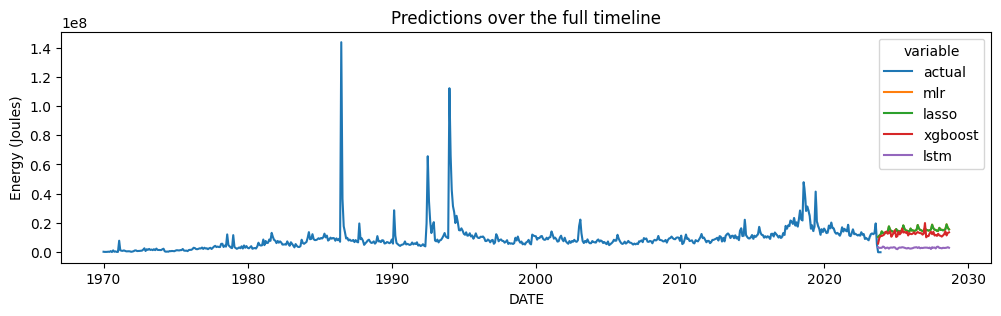

In [274]:
future_predictor(df9, pred_df9, 9)